# A Project for You



## Instructions

For this, you'll need to make several classification models and select the best one. Your notebook will illustrate and explain this process. 

### Detailed Requirements

<ol>
<li> You need one model per person. Decide on a slightly different approach for each person - you can change things like varaibles used, preparation, Regression or Bayes models, and othe things like that.</li>
<li> For each model, you must: </li>
    <ol>
    <li> Create a predictive model. </li>
    <li> Evaluate its performance. </li>
    <li> Create a markdown cell that explains your model choice and evaluation. </li>
    </ol>
<li> Overall, as a team, your team will select the best model from the selection. </li>
<li> <b> This needs to be in one workbook, containing: </b></li>
    <ol>
    <li> Initial data exploration/preparation from original data to 'ready for modeling'. Any preparation that is <b>common</b> to everyone should go here. Exact details will vary, but you want to explore the data visually as well as numerically. Focus on stuff that impacted decisions - what did you find in the data that caused you to take action or make a different choice? </li>
    <li> A markdown cell that briefly explains, ideally mostly in point form, what you found whilst exploring and what preparation you needed to do. Based on those findings, what are the different model approaches?</li>
    <li> Each person's model, evaluation, and explanation in their own section. </li>
    <li> An overall conclusion of what was best and how well it worked. Present your results in some kind of visualization. </li>
    </ol>
<li><b> In the workbook, please have the code that you settled on to explore, clean, model, and evaluate. In the explaination cells, give a brief explaination of what you did and how you got to what you settled on. </b> </li>
<li> In the data preparation, consider statistics stuff. Things such as transformations may be worth a try. </li>
<li> You don't need to spent an eternity tuning the models to get amazing results, we will worry more about that later. Make N reasonable choices on an approach to take based on what the data looks like, do the appropriate preparation, test the models, and observe the results. <b>The raw accuracy scores don't matter, only the approach.</b> </li>
</ol>

Overall, the workbook should clearly show what happened - you exlored the data, made some general processing steps, decided on different approaches based on what you found, created models according to each approach (model specific exploration/prep, model creation, evaluation), and an overall conclusion summarising what you found and what you would try next if you were to continue testing. In doing the data exploration especially, it is pretty normal to have several iterations of exploring and cleaning data - for example, you might add a filter for an outlier, look at a pair plot, adjust the filter, look at a pair plot, add another filter, look at a pair plot, and so on. Please don't show this literal process step by step, condense it down to what matters - something like, "here's the distributions, we did these outlier filters and removed these two features, here's the result", then continuing on. Basically, illustrate what happened and why, but not all of the back and forth or deliberation that went into it.

<b>Note:</b> I said that you can try Bayes as well; it isn't mandatory, but feel free. If you do, you'll need to likely do a little reading on the details of exactly what to use, there are a few variations on Bayes that aren't just 'Bayes' and you'll need to select. The documentation has a pretty good explainer (it is generally linkined in the 'user guide' link of each model's documentaion page, or google "sklearn naive bayes"), and things work more or less the same, you just need to meet the requirements of the specific model you choose.

### Submission and Marks
<ul>
<li> Check your work into the repository. I'm reading one file, so please make sure it is condensed. </li>
<li> Grade distribution: </li>
    <ul>
    <li> Your model - from the end of the common preparation to your evaluation and explaination. Was it done correctly. 25% </li>
    <li> Exploration and common preparation - code was clear, exploration was readable, preparation was done correctly, and explaination made sense. 25% </li>
    <li> Team choice on model approach - based on what you fond in exloration, you made reasonable choices on the different model approaches. 10% </li>
    <li> Overall conclusion - reasonable choice on best model, <b>thoughts on what you may try next if you were to keep testing</b>, and results presented clearly. 20% </li>
    <li> "Can I read and understand it?" - overall, you're explaining what you found, can I read it and understand what you did. 20% </li>
    </ul>
</ul>

#### Data Dictionary

📘 Overview

This dataset provides detailed information about students enrolled in various online courses. It includes demographic, behavioral, and performance features to predict whether a learner will complete the course or drop out.

📊 Key Details
<ul>
<li>Rows: 100,000</li>
<li>Target Variable: Completed</li>
</ul>

🧠 Feature Categories
<ul>
<li>Demographic: Gender, Age, Education_Level, Employment_Status</li>
<li>Course Info: Course_Level, Duration, Instructor_Rating</li>
<li>Engagement: Login_Frequency, Video_Completion_Rate, Discussion_Participation</li>
<li>Performance: Assignments_Submitted, Quiz_Score_Avg, Project_Grade, Progress_Percentage</li>
<li>Other: Payment_Mode, Discount_Used, App_Usage_Percentage</li>
</ul>

<b>Note:</b> The feature set is mixed, meaning there are both categorical and numerical variables present in the dataset. <b>Mixed featureds generally require different processing. We haven't done the tool that mixes these easily yet, that's fine and ok, we have stats instead. Right now, there are several decisions you can make to use both the numerical and categorical data together, think about how to represent the data and some of the options we have available for transformations.</b> This is part of what you want to figure out while exploring the data - you have a constraint on your ability to use mixed feature sets, yet you must use the data you <i>do</i> have, along with the different processing choices you can make, to create a model. Again, you are testing a few approaches against each other, the idea isn't to pick the best approach off the top of your head, it's to make reasonable attempts to narrow down what works best. This isn't a trick for one specific action, there's a bunch of things you can do that are reasonable. Later, we'll automate some of this, so we can try more things to work towards the 'best' model.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

df = pd.read_csv("cleaned_student_data.csv")
TARGET_COL = "Completed"
print(df[TARGET_COL].describe())
df.sample(10)

count            100000
unique                2
top       Not Completed
freq              50970
Name: Completed, dtype: object


,Student_ID,Name,Gender,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,...,Assignments_Submitted,Quiz_Attempts,Progress_Percentage,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,App_Usage_Percentage,Satisfaction_Rating,Completed
42585,STU142585,Rohan Bhardwaj,Male,Bachelor,Employed,Chennai,Mobile,Medium,C104,Digital Marketing Essentials,...,8,3,72.9,14-11-2023,UPI,Yes,No,76,5.0,Completed
58437,STU158437,Sai Sharma,Female,Master,Student,Jaipur,Laptop,Medium,C103,Introduction to AI,...,8,3,81.6,11-03-2025,Credit Card,Yes,Yes,98,4.0,Not Completed
76230,STU176230,Meera Mehta,Female,Bachelor,Student,Pune,Tablet,Low,C104,Digital Marketing Essentials,...,1,5,25.8,04-05-2024,Free,No,No,48,4.0,Not Completed
83671,STU183671,Sneha Bhardwaj,Male,Diploma,Employed,Indore,Laptop,High,C101,Python Basics,...,5,4,48.0,28-10-2023,Free,No,No,60,5.0,Not Completed
17376,STU117376,Rohan Shah,Female,HighSchool,Student,Surat,Laptop,High,C108,Excel for Business,...,6,8,57.3,23-02-2024,NetBanking,Yes,No,91,5.0,Completed
44256,STU144256,Priya Sharma,Male,Bachelor,Student,Bhopal,Mobile,Medium,C102,Data Analysis with Python,...,6,3,61.8,14-12-2023,NetBanking,Yes,No,54,5.0,Completed
32881,STU132881,Sakshi Sharma,Male,Bachelor,Student,Vadodara,Laptop,High,C107,Statistics for Data Science,...,4,3,51.6,08-02-2024,Credit Card,Yes,No,70,4.0,Completed
79416,STU179416,Sneha Reddy,Female,Master,Employed,Vadodara,Mobile,Medium,C102,Data Analysis with Python,...,4,1,47.5,07-01-2024,Debit Card,Yes,No,68,3.0,Not Completed
78997,STU178997,Nikhil Verma,Male,Master,Student,Nagpur,Mobile,High,C106,Machine Learning A-Z,...,6,8,61.1,09-04-2024,Scholarship,No,Yes,92,5.0,Not Completed
45129,STU145129,Rahul Mehta,Female,Master,Student,Vadodara,Mobile,High,C103,Introduction to AI,...,6,3,59.9,15-03-2024,Debit Card,Yes,No,59,4.0,Completed


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discussion_Participation,100000.0,2.329290,1.591365,0.0,1.0,2.0,3.0,12.0
Time_Spent_Hours,100000.0,3.873632,3.781185,0.5,0.5,2.7,6.2,25.6
Days_Since_Last_Login,100000.0,6.188860,6.982047,0.0,1.0,4.0,9.0,99.0
Peer_Interaction_Score,100000.0,6.294509,1.977552,0.0,4.9,6.3,7.7,10.0
Assignments_Submitted,100000.0,4.775430,1.664640,0.0,4.0,5.0,6.0,10.0
Quiz_Attempts,100000.0,3.772330,2.021276,0.0,2.0,4.0,5.0,16.0
Progress_Percentage,100000.0,53.823104,12.495622,7.6,45.4,53.9,62.4,98.6
App_Usage_Percentage,100000.0,67.859510,19.138354,0.0,55.0,68.0,82.0,100.0
Satisfaction_Rating,100000.0,4.135720,0.746730,1.0,4.0,4.0,5.0,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Student_ID                   100000 non-null  object 
 1   Name                         100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Education_Level              100000 non-null  object 
 4   Employment_Status            100000 non-null  object 
 5   City                         100000 non-null  object 
 6   Device_Type                  100000 non-null  object 
 7   Internet_Connection_Quality  100000 non-null  object 
 8   Course_ID                    100000 non-null  object 
 9   Course_Name                  100000 non-null  object 
 10  Category                     100000 non-null  object 
 11  Course_Level                 100000 non-null  object 
 12  Discussion_Participation     100000 non-null  int64  
 13  

In [5]:
# Check for missing values

df.isnull().sum().sort_values()

Student_ID                     0
App_Usage_Percentage           0
Discount_Used                  0
Fee_Paid                       0
Payment_Mode                   0
Enrollment_Date                0
Progress_Percentage            0
Quiz_Attempts                  0
Assignments_Submitted          0
Peer_Interaction_Score         0
Days_Since_Last_Login          0
Time_Spent_Hours               0
Discussion_Participation       0
Course_Level                   0
Category                       0
Course_Name                    0
Course_ID                      0
Internet_Connection_Quality    0
Device_Type                    0
City                           0
Employment_Status              0
Education_Level                0
Gender                         0
Name                           0
Satisfaction_Rating            0
Completed                      0
dtype: int64

### Models:
- Multiple Logistic Regression - Marci
    - Y (target) = 'Completed'
- Decision Tree (Random Forest) - Shilvi
- Naive Bayes - Kevin



#### To Do:
- Filter outliers
- Consider changing 'Fee_Paid', 'Discount_Used', and 'Completed' to boolean
- Reshape
- Encode categorical columns
    - Nominal features - One-Hot encoding, drop last column
    - Ordinal features - Ordinal encoding
- Check multicollinearity (VIF)
- Remove features
- Remove categories if necessary


In [6]:
df['Device_Type'].value_counts()

Device_Type
Mobile    60021
Laptop    35018
Tablet     4961
Name: count, dtype: int64

In [49]:
# Drop columns not relevant to predictions

df2 = df.drop(columns={'Student_ID', 'Name', 'Course_ID', 'Course_Name', 'Enrollment_Date', 'City'})

Dropped these columns because we believe they won't improve the predictive model and could potentially cause distrubances

In [8]:
# Visualize correlations (sample of 100)
# Might need to reconsider this... way too many variables

#sns.pairplot(df2.sample(100), hue='Completed', kind='reg')

In [51]:
# Create correlation matrix for numerical features

num_list = df2.select_dtypes(include='number').columns.tolist()                         # Get list of numerical columns

corr = df2[num_list].corr()
corr.style.background_gradient()

,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Peer_Interaction_Score,Assignments_Submitted,Quiz_Attempts,Progress_Percentage,App_Usage_Percentage,Satisfaction_Rating
Discussion_Participation,1.000000,0.030708,-0.037039,0.056707,0.090871,0.076666,0.099584,0.032105,0.037540
Time_Spent_Hours,0.030708,1.000000,-0.014071,0.028299,0.030706,0.027819,0.034075,0.010859,0.013294
Days_Since_Last_Login,-0.037039,-0.014071,1.000000,-0.025742,-0.054597,-0.044541,-0.056965,-0.016807,-0.025186
Peer_Interaction_Score,0.056707,0.028299,-0.025742,1.000000,0.076765,0.056174,0.082565,0.032622,0.032156
Assignments_Submitted,0.090871,0.030706,-0.054597,0.076765,1.000000,0.098953,0.833256,0.048317,0.052991
Quiz_Attempts,0.076666,0.027819,-0.044541,0.056174,0.098953,1.000000,0.108285,0.038661,0.043303
Progress_Percentage,0.099584,0.034075,-0.056965,0.082565,0.833256,0.108285,1.000000,0.051809,0.056563
App_Usage_Percentage,0.032105,0.010859,-0.016807,0.032622,0.048317,0.038661,0.051809,1.000000,0.020783
Satisfaction_Rating,0.037540,0.013294,-0.025186,0.032156,0.052991,0.043303,0.056563,0.020783,1.000000


In [52]:
# Drop numerical features with visually obvious correlation

df2 = df2.drop(columns={'Assignments_Submitted'})

Dropped 'Assignments_Submitted' column because of the high correlation with Progress_Percentage (multicollinearity).  

In [53]:
# Prep work for loops

num_list = df2.select_dtypes(include='number').columns.tolist()                         # Get list of numerical columns
cat_list = df2.select_dtypes(include=['object', 'category']).columns.tolist()           # Get list of categorical columns

num_length = len(num_list)                                                              # Get length of lists for subplots
cat_length = len(cat_list)

print('num_list length:', num_length)
print('cat_list length:', cat_length)

num_list length: 8
cat_list length: 11


In [54]:
# Convert dtype object columns to dtype category

for column in cat_list:
    df2[column] = df2[column].astype('category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Gender                       100000 non-null  category
 1   Education_Level              100000 non-null  category
 2   Employment_Status            100000 non-null  category
 3   Device_Type                  100000 non-null  category
 4   Internet_Connection_Quality  100000 non-null  category
 5   Category                     100000 non-null  category
 6   Course_Level                 100000 non-null  category
 7   Discussion_Participation     100000 non-null  int64   
 8   Time_Spent_Hours             100000 non-null  float64 
 9   Days_Since_Last_Login        100000 non-null  int64   
 10  Peer_Interaction_Score       100000 non-null  float64 
 11  Quiz_Attempts                100000 non-null  int64   
 12  Progress_Percentage          100000 non-null 

In [ ]:
# Box and Count plots for categorical

#rows = cat_length / 2

#fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(20,12))

#fig.suptitle("Categorical Plotting", fontsize=20)
#sns.boxplot(x="Cylinders", y="MPG", data=df2,ax=ax[0,0])
#sns.boxplot(x="Origin", y="MPG", data=df2,ax=ax[0,1])
#sns.countplot(x="Cylinders", data=df2,ax=ax[1,0])
#sns.countplot(x="Origin", data=df2,ax=ax[1,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

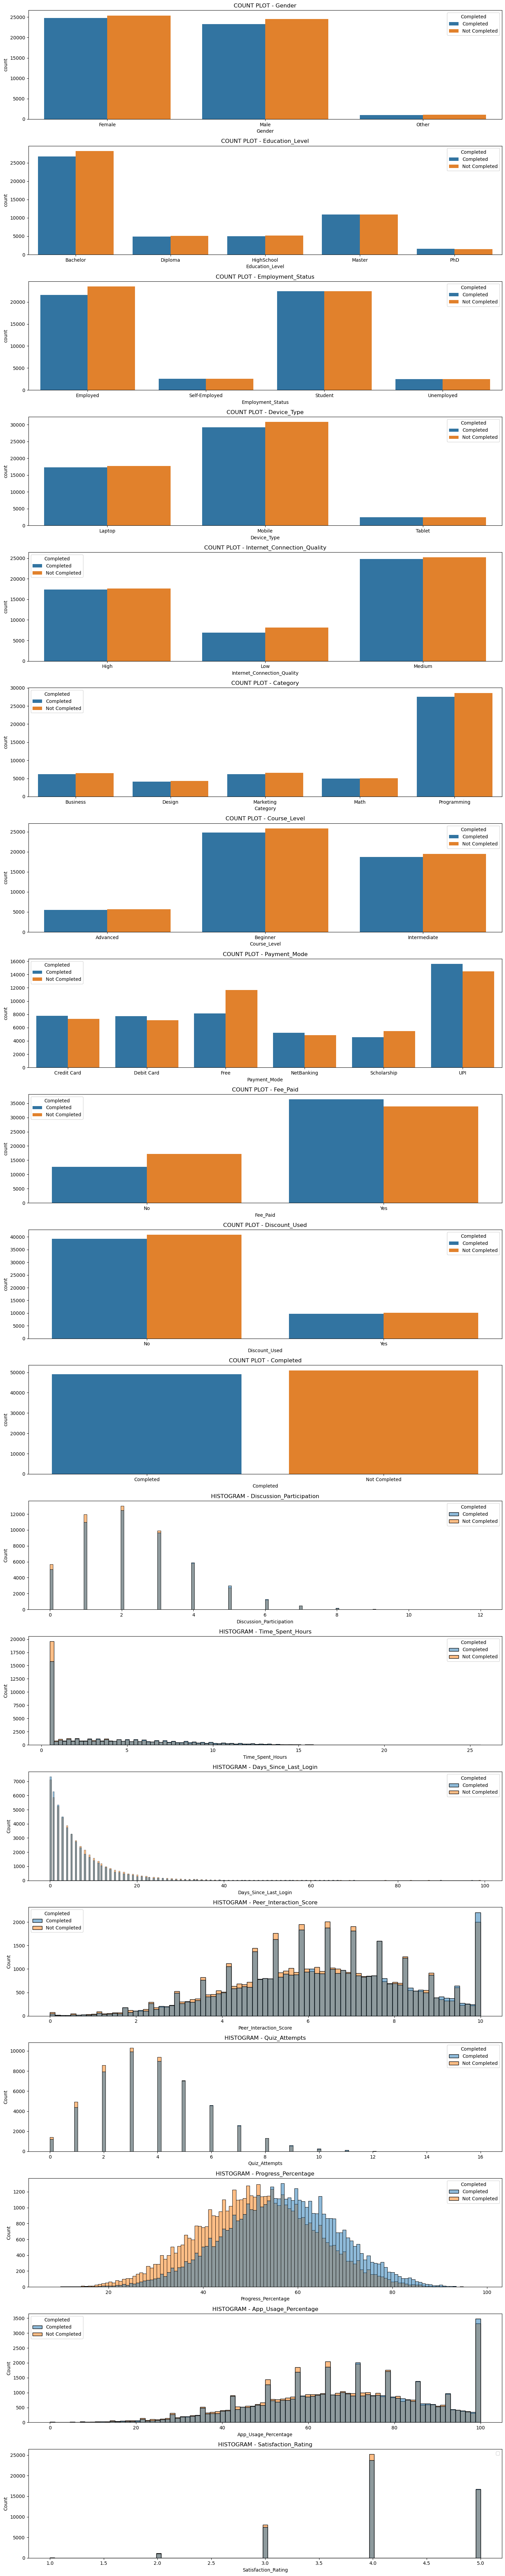

In [ ]:
# Explore data distribution, check for outliers

columns = cat_list + num_list                                                                   # Get list of all columns, with categorical first, then numerical
sub_rows = len(columns)                                                                         # Use length of columns as number of subplot rows
sub_cols = 1                                                                                    # Number of subplot columns

fig, ax = plt.subplots(sub_rows, sub_cols, figsize=(6,4*sub_rows))                             # Create subplots based on number of columns in list

for i, column in enumerate(columns):                                                            # Loop through df (need index for plotting)

    if df2[column].dtype == 'category':                                                         # If feature is categorical, create Count Plot
        sns.countplot(df2, x=column, ax=ax[i], hue='Completed')
        ax[i].set_title(f'COUNT PLOT - {column}')
        plt.tight_layout()
    else:                                                                                       # If feature is not categorical (numerical by default), create Histogram
        sns.histplot(df2, x=column, ax=ax[i], line_kws={'label':'KDE'}, hue='Completed')
        ax[i].set_title(f'HISTOGRAM - {column}')
        #plt.legend()
        plt.tight_layout()

    #sns.boxplot(df2, x=column, ax=ax[i, 1], hue='Completed')                                    # Create boxplot
    #ax[i, 1].set_title(f'BOXPLOT - {column}')                                
    #ax[i, 1].set_xlabel(column)   

plt.show()

In [13]:
# Convert select columns to boolean

#df['Fee_Paid'] = df['Fee_Paid'].map({'Yes': True, 'No': False})
#df['Discount_Used'] = df['Discount_Used'].map({'Yes': True, 'No': False})
#df['Completed'] = df['Completed'].map({'Completed': True, 'Not Completed': False})

#df.info()

In [14]:
# Encode using One-Hot method and drop the first column

#df2 = pd.get_dummies(df_, drop_first=True)
#df2.sample(5)

In [15]:
# Split data into features (Xs) and target (Y)

#dfY = df2["MPG"]                  # Target ('MPG')
#dfX = df2.drop(columns={"MPG"})   # Features

In [16]:
# Reshape data

#y = np.array(dfY).reshape(-1,1)
#x = np.array(dfX)
#x.shape, y.shape

In [17]:
# Calc Variance Inflaction Factors



### Marci's Model

### Shilvi's Model

### Kevin's Model